In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [2]:
data = pd.read_csv('data/shuttle_data.csv')
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


## Exploratory Data Analysis

In [3]:
data.shape

(8518, 8)

### Check Duplicate values

In [4]:
duplicate_rows = data[data.duplicated()]

### Check Null values

In [5]:
data.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [6]:
data.dropna(subset=['Review text'], inplace=True)

In [7]:
## Check the shape of the dataset
data.shape

(8510, 8)

### View some review text

In [8]:
data.loc[0, 'Review text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [9]:
data.loc[1, 'Review text']

"They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest....  Sad to hear this.READ MORE"

In [10]:
data.loc[2, 'Review text']

"Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.READ MORE"

* **Here, we can see that in the review, 'READ MORE' is present. It seems the data is not properly scrapped.**

<AxesSubplot:xlabel='Ratings', ylabel='count'>

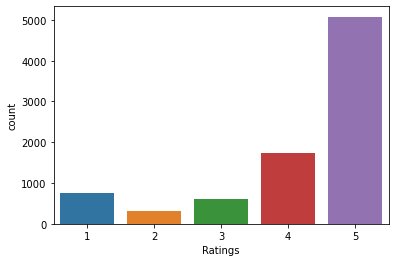

In [11]:
## Check the distribution of Ratings
sns.countplot(x='Ratings', data=data)

In [12]:
# Distribution on target variable looks non-uniform

data['Ratings'].value_counts(normalize=True)

5    0.596827
4    0.204935
1    0.090012
3    0.072268
2    0.035958
Name: Ratings, dtype: float64

### Under-Sampling Techniques
#### Advantage           
* It can help imporve run time and storage problems by reducing the number of training data samples when the training dataset is huge.

#### Disadvantage         
* It can discard potentially usefull information which could be important for building rule classifiers.             

### Up-Sampling Techinques
#### Advantage                   
* Unlike under-sampling, this method leads to no information loss.              
* Outperform under sampling                 

#### Disadvantage             
* It increase the likelihood of overfitting since it replicates the minority class events.  

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8510 entries, 0 to 8509
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8510 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 856.4+ KB


##### Here, we can see that the Review Text is of object type. It contains numbers or emojis, which is why its type is object. Therefore, we can convert it to a string datatype.

In [14]:
data['Review text'] = data['Review text'].astype(str)

### Visualize the text with a word cloud to see which words have a higher frequency.

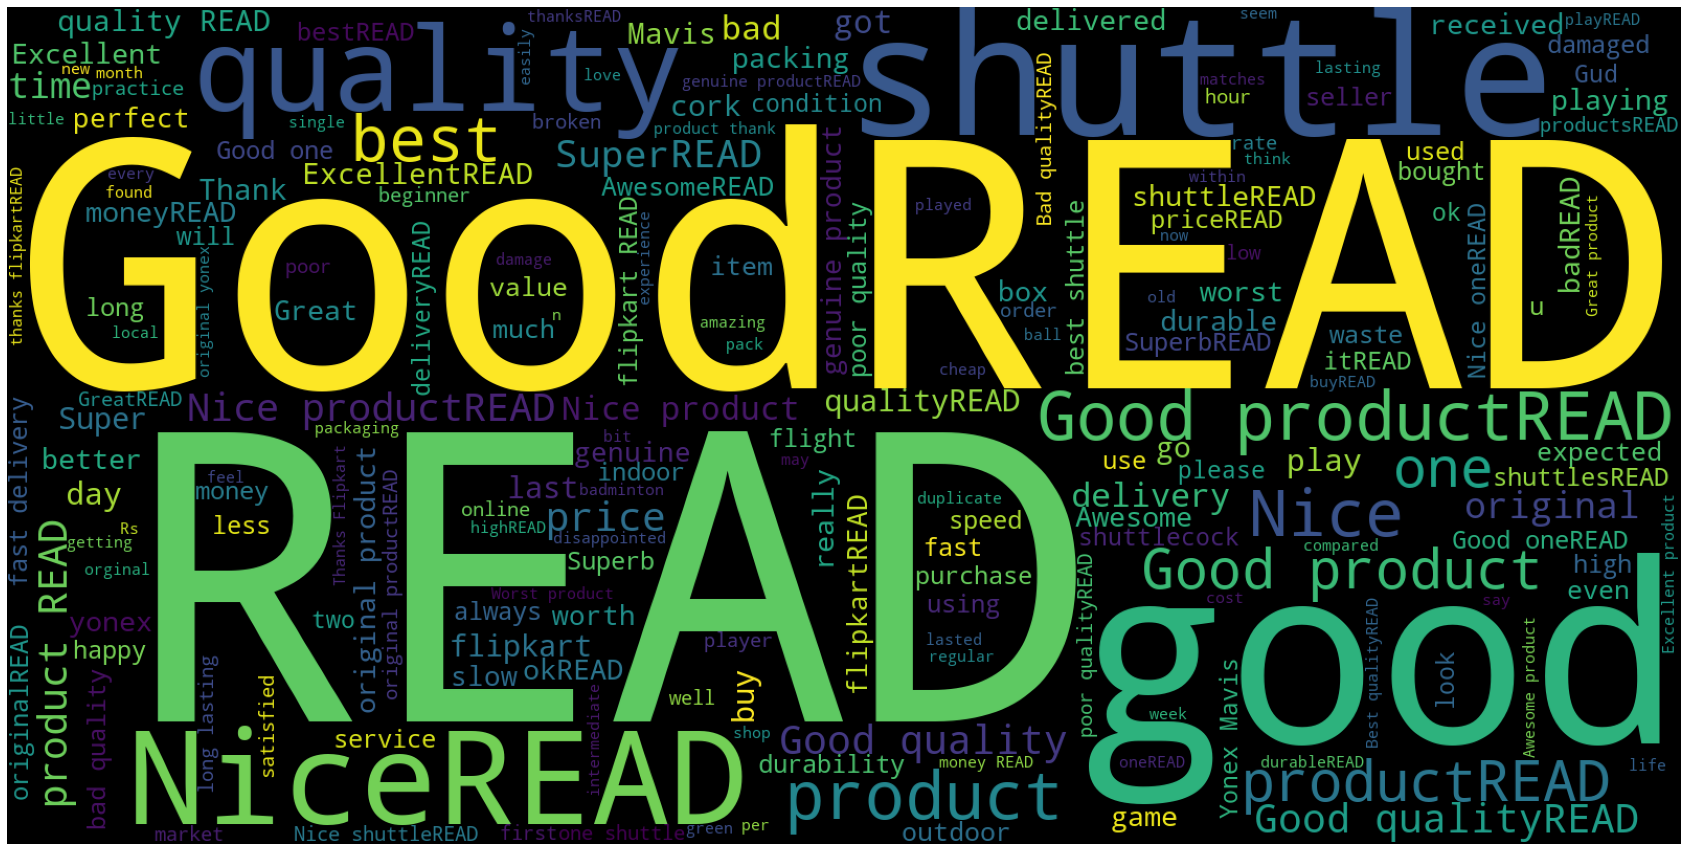

In [15]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data['Review text']))


import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

**Here, we can observe that the most frequent text values are 'READ' and 'GOOD.' This is because most of the reviews are positive. However, the reviews are not proper; many contain 'READ MORE.' Consequently, 'Read' and 'Good' are the frequent values present in the dataset.**

## Identify Input and Output

In [16]:
X = data[['Review text']] # the column text contains textual data to extract features from
y = data['Ratings'] # this is the column we are learning to predict.

print(X.shape, y.shape)

(8510, 1) (8510,)


## Split the data into train and test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6382, 1) (6382,)
(2128, 1) (2128,)


In [18]:
X_train.head()

,Review text
210,Yonex Mavis 350 is not a pure item. shuttle's ...
5900,it's top&bottom cabs are very light weight!why...
295,Very worst productREAD MORE
2221,The shuttle are good.... If u play normally it...
4270,Cheaper than market and they are originalREAD ...


### Data Prepration - Text Preprocessing

In [19]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [20]:
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [22]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

#### Define a function to remove redundant text and clean the text.

In [23]:
import string
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # This text contains a lot of READ MORE. So replace this values
    sentence = sentence.replace("READ MORE", " ")

    # Remove punctuation and numbers.
    sentence = "".join([char for char in sentence if char not in string.punctuation and not char.isdigit()])

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens)])

In [24]:
from tqdm import tqdm, tqdm_notebook

In [25]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [26]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = X_train['Review text'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df.head()


100%|█████████████████████████████████████████████████████████████████████████████| 6382/6382 [00:22<00:00, 288.07it/s]


,0
210,yonex mavis pure item shuttle old
5900,top bottom cab light weight original
295,worst product
2221,shuttle good u play normally last week since m...
4270,cheaper market original


In [27]:
temp_df.columns = ['clean_review']

temp_df.head()

,clean_review
210,yonex mavis pure item shuttle old
5900,top bottom cab light weight original
295,worst product
2221,shuttle good u play normally last week since m...
4270,cheaper market original


In [28]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,Review text,clean_review
210,Yonex Mavis 350 is not a pure item. shuttle's ...,yonex mavis pure item shuttle old
5900,it's top&bottom cabs are very light weight!why...,top bottom cab light weight original
295,Very worst productREAD MORE,worst product
2221,The shuttle are good.... If u play normally it...,shuttle good u play normally last week since m...
4270,Cheaper than market and they are originalREAD ...,cheaper market original


In [29]:
## View some text of clean review text
X_train.loc[1,'clean_review']

'supplied yonex mavis outside cover yonex ad inside cheapest sad hear'

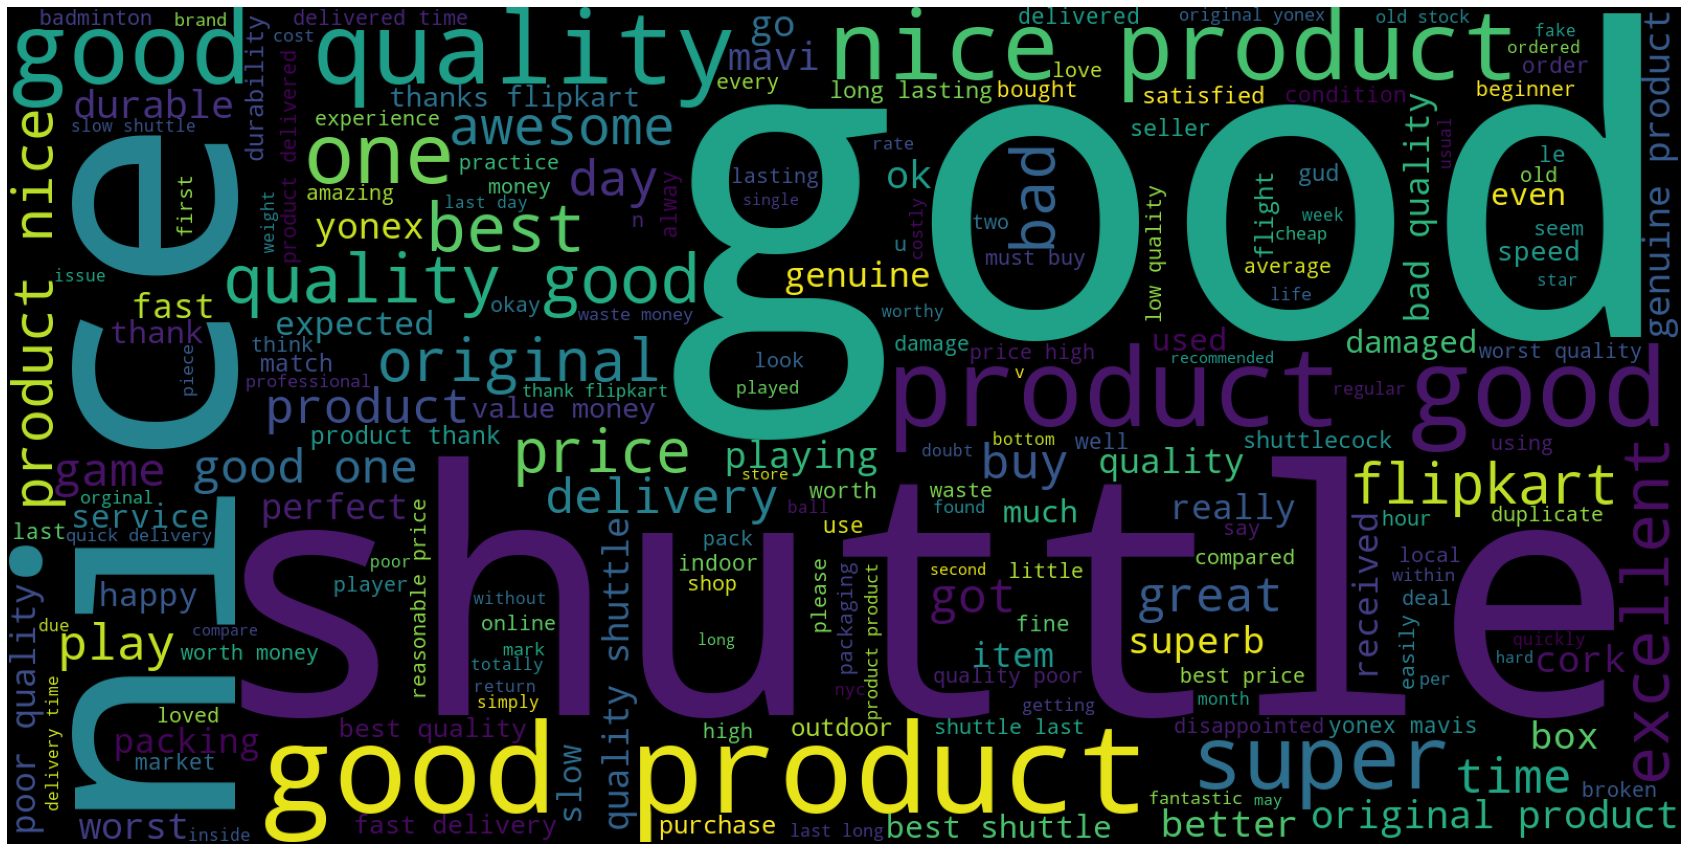

In [30]:
### Let's see the Wordcloud for the clean review
wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(X_train['clean_review']))

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Converting Text to Numerical vectors - BOW Representation
* **Step 1** - Learn the vocabulary from the train data.
* **Step 2** - Transform the train['review text'] to X_train (i.e. DTM).
* **Step 3** - Transform the test['review text'] to X_test (i.e. DTM).

In [31]:
X_train.head()

,Review text,clean_review
210,Yonex Mavis 350 is not a pure item. shuttle's ...,yonex mavis pure item shuttle old
5900,it's top&bottom cabs are very light weight!why...,top bottom cab light weight original
295,Very worst productREAD MORE,worst product
2221,The shuttle are good.... If u play normally it...,shuttle good u play normally last week since m...
4270,Cheaper than market and they are originalREAD ...,cheaper market original


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_review'])

In [33]:
# ! pip install imbalanced-learn

In [34]:
from imblearn.over_sampling import ADASYN,SMOTE

# Create a ADASYN instance
adasyn = ADASYN()

# Apply KMeansSMOTE to balance the classes in the training set
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_bow, y_train)

In [35]:
# X_train_bow
X_train_resampled

<19088x2156 sparse matrix of type '<class 'numpy.int64'>'
	with 79469 stored elements in Compressed Sparse Row format>

In [36]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_resampled))

print("Shape of input data:", X_train_resampled.shape)

Total unique words: 2156
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (19088, 2156)


In [37]:
print(X_train_resampled.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<AxesSubplot:>

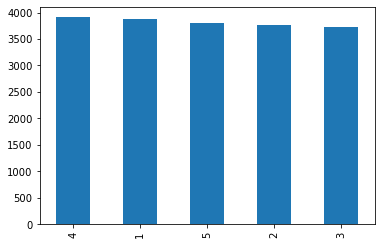

In [38]:
y_train_resampled.value_counts().plot(kind='bar')

### Preprocessing the Test Data

In [39]:
X_test.head()

,Review text
3691,Not badREAD MORE
1634,NiceREAD MORE
3663,NiceREAD MORE
7137,It really goodREAD MORE
4917,bad productREAD MORE


In [40]:
temp_df = X_test['Review text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:06<00:00, 328.23it/s]


,0
3691,bad
1634,nice
3663,nice
7137,really good
4917,bad product


In [41]:
temp_df.columns = ['clean_review']

temp_df.head()

,clean_review
3691,bad
1634,nice
3663,nice
7137,really good
4917,bad product


In [42]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,Review text,clean_review
3691,Not badREAD MORE,bad
1634,NiceREAD MORE,nice
3663,NiceREAD MORE,nice
7137,It really goodREAD MORE,really good
4917,bad productREAD MORE,bad product


In [43]:
X_test_bow = vocab.transform(X_test['clean_review'])

### Create the model and trained the model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

y_test_pred = lr.predict(X_test_bow)

# Caculate Accuracy
print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))


0.4158834586466165
              precision    recall  f1-score   support

           1       0.52      0.53      0.52       192
           2       0.08      0.20      0.11        76
           3       0.13      0.39      0.19       154
           4       0.26      0.31      0.28       436
           5       0.78      0.45      0.57      1270

    accuracy                           0.42      2128
   macro avg       0.35      0.37      0.34      2128
weighted avg       0.58      0.42      0.46      2128



### Converting Text to Numerical vectors - Word2Vec Representation

**Step 1** - Import `Word2Vec` module from `gensim.models`  
**Step 2** - Convert the sentences to the List of Words (i.e. List of Tokens)  
**Step 3** - Use Word2Vec to learn numerical vectors for each unique words. Word2Vec uses the list of tokens and generate 300Dimensional numerical vector for each unique word.  
**Step 4** - Convert the word vectors to document vectors.

In [46]:
# ! pip install --upgrade gensim

In [47]:
import gensim

print(gensim.__version__)

4.1.2


In [48]:
from gensim.models import Word2Vec

In [49]:
## tokenized the sentences into words
X_train['tokenised_sentences'] = X_train['clean_review'].apply(lambda sent : sent.split())

X_train.head()

,Review text,clean_review,tokenised_sentences
210,Yonex Mavis 350 is not a pure item. shuttle's ...,yonex mavis pure item shuttle old,"[yonex, mavis, pure, item, shuttle, old]"
5900,it's top&bottom cabs are very light weight!why...,top bottom cab light weight original,"[top, bottom, cab, light, weight, original]"
295,Very worst productREAD MORE,worst product,"[worst, product]"
2221,The shuttle are good.... If u play normally it...,shuttle good u play normally last week since m...,"[shuttle, good, u, play, normally, last, week,..."
4270,Cheaper than market and they are originalREAD ...,cheaper market original,"[cheaper, market, original]"


In [50]:
# train model

model = Word2Vec(list(X_train.tokenised_sentences), vector_size=300, min_count=1)

In [51]:
print(model)

Word2Vec(vocab=2170, vector_size=300, alpha=0.025)


In [52]:
# Checking the shape of vectors learned by the model

print(model.wv.__getitem__(model.wv.index_to_key).shape)

(2170, 300)


In [53]:
def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]

    if not vocab_tokens:
        # If there are no tokens in the vocabulary, return a zero vector
        return np.zeros(keyed_vectors.vector_size)

    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [54]:
X_train['doc_vector'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

100%|████████████████████████████████████████████████████████████████████████████| 6382/6382 [00:00<00:00, 8122.13it/s]


In [55]:
X_train.head()

,Review text,clean_review,tokenised_sentences,doc_vector
210,Yonex Mavis 350 is not a pure item. shuttle's ...,yonex mavis pure item shuttle old,"[yonex, mavis, pure, item, shuttle, old]","[0.029535064, 0.14289534, -0.10472842, 0.04213..."
5900,it's top&bottom cabs are very light weight!why...,top bottom cab light weight original,"[top, bottom, cab, light, weight, original]","[0.014316726, 0.066825666, -0.04687761, 0.0202..."
295,Very worst productREAD MORE,worst product,"[worst, product]","[0.024030518, 0.12087844, -0.086988285, 0.0356..."
2221,The shuttle are good.... If u play normally it...,shuttle good u play normally last week since m...,"[shuttle, good, u, play, normally, last, week,...","[0.02262919, 0.10342084, -0.07596026, 0.030340..."
4270,Cheaper than market and they are originalREAD ...,cheaper market original,"[cheaper, market, original]","[0.018517122, 0.093102396, -0.06534261, 0.0289..."


In [56]:
X_train_w2v = list(X_train.doc_vector)

In [57]:
X_train_resampled_w2v, y_train_resampled_w2v = adasyn.fit_resample(X_train_w2v, y_train)

### Preprocessing the Test Data

In [58]:
X_test.head()

,Review text,clean_review
3691,Not badREAD MORE,bad
1634,NiceREAD MORE,nice
3663,NiceREAD MORE,nice
7137,It really goodREAD MORE,really good
4917,bad productREAD MORE,bad product


In [59]:
X_test['tokenised_sentences'] = X_test['clean_review'].apply(lambda sent: sent.split())
X_test.head()

,Review text,clean_review,tokenised_sentences
3691,Not badREAD MORE,bad,[bad]
1634,NiceREAD MORE,nice,[nice]
3663,NiceREAD MORE,nice,[nice]
7137,It really goodREAD MORE,really good,"[really, good]"
4917,bad productREAD MORE,bad product,"[bad, product]"


In [60]:
X_test['doc_vector'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

100%|████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:00<00:00, 9726.62it/s]


In [61]:
X_test.head()

,Review text,clean_review,tokenised_sentences,doc_vector
3691,Not badREAD MORE,bad,[bad],"[0.020916956, 0.09870662, -0.07162824, 0.03183..."
1634,NiceREAD MORE,nice,[nice],"[0.0159192, 0.060536474, -0.04536281, 0.018858..."
3663,NiceREAD MORE,nice,[nice],"[0.0159192, 0.060536474, -0.04536281, 0.018858..."
7137,It really goodREAD MORE,really good,"[really, good]","[0.021830136, 0.11026777, -0.07947865, 0.03665..."
4917,bad productREAD MORE,bad product,"[bad, product]","[0.024579069, 0.12719786, -0.092027724, 0.0383..."


In [62]:
X_test_w2v = list(X_test.doc_vector)

### Decision Tree Classifier

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train_resampled_w2v, y_train_resampled_w2v)

y_test_pred = dt.predict(X_test_w2v)

# Caculate Accuracy
print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))


0.36137218045112784
              precision    recall  f1-score   support

           1       0.28      0.35      0.31       192
           2       0.06      0.16      0.09        76
           3       0.12      0.16      0.14       154
           4       0.25      0.49      0.33       436
           5       0.69      0.36      0.47      1270

    accuracy                           0.36      2128
   macro avg       0.28      0.30      0.27      2128
weighted avg       0.50      0.36      0.39      2128



### Pretrained GloVe for Sentence Vector

In [64]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

4.1.2
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [65]:
wv = api.load('glove-twitter-50')

In [66]:
# Total number of vocabulary words in pretrained model

len(wv.index_to_key)

1193514

In [67]:
X_train.head()

,Review text,clean_review,tokenised_sentences,doc_vector
210,Yonex Mavis 350 is not a pure item. shuttle's ...,yonex mavis pure item shuttle old,"[yonex, mavis, pure, item, shuttle, old]","[0.029535064, 0.14289534, -0.10472842, 0.04213..."
5900,it's top&bottom cabs are very light weight!why...,top bottom cab light weight original,"[top, bottom, cab, light, weight, original]","[0.014316726, 0.066825666, -0.04687761, 0.0202..."
295,Very worst productREAD MORE,worst product,"[worst, product]","[0.024030518, 0.12087844, -0.086988285, 0.0356..."
2221,The shuttle are good.... If u play normally it...,shuttle good u play normally last week since m...,"[shuttle, good, u, play, normally, last, week,...","[0.02262919, 0.10342084, -0.07596026, 0.030340..."
4270,Cheaper than market and they are originalREAD ...,cheaper market original,"[cheaper, market, original]","[0.018517122, 0.093102396, -0.06534261, 0.0289..."


In [68]:
X_train['doc_vector_pretrained_glove'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, wv))

100%|█████████████████████████████████████████████████████████████████████████████| 6382/6382 [00:56<00:00, 112.00it/s]


In [69]:
X_train.head()

,Review text,clean_review,tokenised_sentences,doc_vector,doc_vector_pretrained_glove
210,Yonex Mavis 350 is not a pure item. shuttle's ...,yonex mavis pure item shuttle old,"[yonex, mavis, pure, item, shuttle, old]","[0.029535064, 0.14289534, -0.10472842, 0.04213...","[-0.45128965, 0.055464998, 0.19419833, -0.0025..."
5900,it's top&bottom cabs are very light weight!why...,top bottom cab light weight original,"[top, bottom, cab, light, weight, original]","[0.014316726, 0.066825666, -0.04687761, 0.0202...","[-0.5619867, -0.696685, 0.11697265, -0.1256175..."
295,Very worst productREAD MORE,worst product,"[worst, product]","[0.024030518, 0.12087844, -0.086988285, 0.0356...","[0.43265, 0.099525, -0.51644224, -0.0375, 0.58..."
2221,The shuttle are good.... If u play normally it...,shuttle good u play normally last week since m...,"[shuttle, good, u, play, normally, last, week,...","[0.02262919, 0.10342084, -0.07596026, 0.030340...","[0.13522246, 0.44320557, -0.020539856, -0.2921..."
4270,Cheaper than market and they are originalREAD ...,cheaper market original,"[cheaper, market, original]","[0.018517122, 0.093102396, -0.06534261, 0.0289...","[-0.59458333, -0.29163697, -0.6073013, 0.07359..."


In [70]:
X_train_glove_pretrained = list(X_train.doc_vector_pretrained_glove)

In [71]:
# Apply ADASYN to balance the classes in the training set
X_train_resampled_glove_pretrained, y_train_resampled_glove_pretrained = adasyn.fit_resample(X_train_glove_pretrained, y_train)

In [72]:
X_test.head()

,Review text,clean_review,tokenised_sentences,doc_vector
3691,Not badREAD MORE,bad,[bad],"[0.020916956, 0.09870662, -0.07162824, 0.03183..."
1634,NiceREAD MORE,nice,[nice],"[0.0159192, 0.060536474, -0.04536281, 0.018858..."
3663,NiceREAD MORE,nice,[nice],"[0.0159192, 0.060536474, -0.04536281, 0.018858..."
7137,It really goodREAD MORE,really good,"[really, good]","[0.021830136, 0.11026777, -0.07947865, 0.03665..."
4917,bad productREAD MORE,bad product,"[bad, product]","[0.024579069, 0.12719786, -0.092027724, 0.0383..."


In [73]:
X_test['doc_vector_pretrained_glove'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, wv))

100%|██████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:27<00:00, 78.59it/s]


In [74]:
X_test_glove_pretrained = list(X_test.doc_vector_pretrained_glove)

### Support Vector Classifier

In [75]:
svm = SVC()
svm.fit(X_train_resampled_glove_pretrained, y_train_resampled_glove_pretrained)

y_test_pred = svm.predict(X_test_glove_pretrained)

# Caculate Accuracy
print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))


0.4050751879699248
              precision    recall  f1-score   support

           1       0.43      0.50      0.46       192
           2       0.08      0.28      0.12        76
           3       0.16      0.26      0.20       154
           4       0.27      0.45      0.34       436
           5       0.78      0.40      0.53      1270

    accuracy                           0.41      2128
   macro avg       0.34      0.38      0.33      2128
weighted avg       0.57      0.41      0.44      2128



## Pretrained BERT for Sentence Vectors

In [76]:
# ! pip install -U sentence-transformers

In [77]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

In [78]:
X_train['doc_vector_pretrained_bert'] = X_train.clean_review.progress_apply(model.encode)

X_train.head()

In [79]:
X_train_bert_pretrained = list(X_train.doc_vector_pretrained_bert)

In [80]:
Apply ADASYN to balance the classes in the training set
X_train_resampled_bert, y_train_resampled_bert = adasyn.fit_resample(X_train_bert_pretrained, y_train)

In [81]:
X_test['doc_vector_pretrained_bert'] = X_test.clean_review.progress_apply(model.encode)

In [82]:
X_test_bert_pretrained = list(X_test.doc_vector_pretrained_bert)

### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_resampled_bert, y_train_resampled_bert)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

### Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_resampled_bert, y_train_resampled_bert)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

**Here, we can see that different algorithms give different results, and the model is also overfitting. Therefore, we can create a pipeline in which we try different models with hyperparameter tuning.**

### Let's extract the clean reviews for both x_train and x_test

In [85]:
X_train_clean = X_train['clean_review']
X_test_clean = X_test['clean_review']

In [86]:
## Define a class in which BertTransformer and GloveVectorizer are initialized.
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import KeyedVectors
from sklearn.preprocessing import FunctionTransformer

class BertTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='all-MiniLM-L6-v2'):
        self.model_name = model_name
        self.model = SentenceTransformer(self.model_name)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.model.encode(text) for text in X]


# Define the GloVeVectorizer class
class GloVeVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model=None):
        self.model = model

    def fit(self, X, y=None):
        # No fitting necessary for pre-trained embeddings
        return self

    def transform(self, X):
        return np.vstack([self.document_vector(doc) for doc in tqdm(X)])

    def document_vector(self, doc):
        """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
        # Filter out-of-vocabulary words
        vocab_tokens = [word for word in doc if word in self.model]

        if not vocab_tokens:
            # If there are no tokens in the vocabulary, return a zero vector
            return np.zeros(self.model.vector_size)

        # Compute the mean vector of the tokens
        return np.mean(self.model[vocab_tokens], axis=0)

## Creating an Optimal Workflow

Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from joblib import Memory

## Caching to optimize the runtime
Caching is a technique used in software engineering to improve performance by storing frequently accessed or computed data in a temporary storage location, known as a cache. The purpose of caching is to reduce the time and resources required to access or compute the same data repeatedly.

We can create the **Memory** object to cache the intermediate results of `vectorization`.

This will avoid redundant computations of vectorization during the grid search, thereby optimizing the runtime. Adjust the cachedir parameter as needed to specify the location for caching the results.


As a software engineer, besides caching, you can employ several techniques to improve the time complexity of your code.
Implement **memoization** to store the results of expensive function calls and reuse them when the same inputs occur again. This is particularly useful for dynamic programming problems.

## Putting it all together: Implementing various Algorithms to find the Best Model

In [98]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define a dictionary of pipelines
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', MultinomialNB())
    ],memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', DecisionTreeClassifier())
    ],memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', LogisticRegression())
    ],memory=memory),
    'random_forest': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier())
    ],memory=memory),
    'svc': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', SVC())
    ],memory=memory),
    'knn': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', KNN())
    ],memory=memory),
    'xgboost': Pipeline([
        ('vectorization',TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', XGBClassifier())
    ],memory=memory),
    'lightgbm': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', LGBMClassifier())
    ]),
    'catboost': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', CatBoostClassifier())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes':[
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__alpha': [0.1, 0.5, 1.0]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
        'classifier__max_depth': [None, 3, 5, 10],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': [None, 'sqrt', 'log2']
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l2']
        },
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1'],
            'classifier__solver': ['liblinear']
        },
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest':[
         {
        'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
        'classifier__n_estimators': [50, 100, 200, 300],
        'classifier__max_depth': [None, 3, 5, 10],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['auto', 'sqrt', 'log2']
        # 'vectorization__max_features': [1000, 1500, 2000, 5000],
         }
    ],
   'svc': [
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__kernel' : ['rbf'],
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        },
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__kernel' : ['poly'],
            'classifier__degree' : [2, 3, 4, 5],
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        },
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__kernel' : ['linear'],
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'knn': [
        {
        'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
        # 'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__n_neighbors': [i for i in range(3, 21, 2)],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__p': [1, 2, 3]
        }
    ],
    'xgboost': [
        {
        'vectorization': [TfidfVectorizer(), GloVeVectorizer(model=wv)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.05, 0.1, 0.5],
        'classifier__subsample': [0.8, 0.9, 1.0],
        'classifier__colsample_bytree': [0.8, 0.9, 1.0],
        'classifier__reg_alpha': [0.1, 0.5, 1.0],
        'classifier__reg_lambda': [0.1, 0.5, 1.0]
        }
    ],
    'lightgbm': [
            {
        'vectorization': [TfidfVectorizer(), GloVeVectorizer(model=wv)],
        'classifier__num_leaves': [20, 30, 40],
        'classifier__n_estimators': [50, 100, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__min_child_samples': [10, 20],
        'classifier__subsample': [0.8, 0.9, 1.0],
        'classifier__colsample_bytree': [0.8, 0.9, 1.0],
        'classifier__reg_alpha': [0.01, 0.1]
        }
    ], 
    'catboost': [
            {
        'vectorization': [TfidfVectorizer(), GloVeVectorizer(model=wv)],
        'classifier__n_estimators': [50, 100, 300],
        'classifier__depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__l2_leaf_reg': [1, 3, 5],
        'classifier__random_strength': [0.1, 0.5],
        'classifier__bagging_temperature': [0.1, 0.5]
    }
    ]
}

In [ ]:
mlflow.end_run()
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10,'\n')
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1_weighted',
                               return_train_score=True,
                               verbose=2
                              )

    %time grid_search.fit(X_train_clean, y_train)
    best_models[algo] = grid_search.best_estimator_
    print(grid_search.score(X_test_clean, y_test))

In [ ]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

In [ ]:
## saved all the trained model in best_models folder
import os
from sklearn import metrics
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')

    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred, average='macro'))

    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

## Deep Learning architecture in which we use a bidirectional LSTM model

In [ ]:
# Encode the sentences using BERT
X_train_bert_embeddings = np.array([model.encode(text) for text in X_train_clean])
X_test_bert_embeddings = np.array([model.encode(text) for text in X_test_clean])

In [ ]:
X_train_bert_embeddings

In [ ]:
# Deep Learning
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=5,
    mode ="max",
    verbose=2,
    restore_best_weights=True
)

In [ ]:
# embedding_dimension=100,
# max_length = 48
# vocab_size=1000
# embeddings_matrix = np.zeros((vocab_size, embedding_dimension))


# Reshape the BERT embeddings to match the expected input shape of the Bidirectional layer
X_train_bert_embeddings = X_train_bert_embeddings[:, np.newaxis, :]
X_test_bert_embeddings = X_test_bert_embeddings[:, np.newaxis, :]


In [ ]:
lstm_model = Sequential([
    tf.keras.layers.Bidirectional(LSTM(units=128, return_sequences=True),  input_shape=(X_train_bert_embeddings.shape[1], X_train_bert_embeddings.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(LSTM(units=128, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(LSTM(units=128)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [ ]:
lstm_model.summary()

In [ ]:
tf.keras.utils.plot_model(lstm_model, show_shapes=True)

In [ ]:
lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    run_eagerly=True
)

In [ ]:
#
history = lstm_model.fit(
    X_train_bert_embeddings,
    y_train,
    epochs=100,
    batch_size=50,
    validation_split=0.2
)

In [ ]:
# Save the model in HDF5 format
lstm_model.save("best_models/lstm_model.h5")

# Load the model
loaded_model = tf.keras.models.load_model("best_models/lstm_model.h5")


#### Check Prediction

In [ ]:
# model = joblib.load('best_models/demo_model_rfc_hpy.pkl')

In [ ]:
# new_data = [
#     """Inflation in the 20-nation euro zone eased to 2.6% in February,
#     flash figures showed on Friday, but both the headline and core
#     figures were higher than expected.
#     Economists polled by Reuters had forecast a headline reading of 2.5%.
#     Core inflation, stripping out volatile components of energy, food,
#     alcohol and tobacco, was 3.1% — above the 2.9% expected.
#     The European Union statistics agency said food, alcohol and tobacco
#     had the highest inflation rate in February at 4%, followed by services
#     at 3.9%."""]

# # prediction = model.predict(new_data)

# # print("Prediction:", prediction)